# ML Classification

In [1]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Importing necessary libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Importing preprocessing tools for encoding categorical features
from sklearn.preprocessing import OrdinalEncoder

# Importing tools for splitting data into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV

# Importing SMOTE-Tomek for handling imbalanced datasets
from imblearn.combine import SMOTETomek

# Importing machine learning models for classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing metrics for evaluating model performance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score,mean_absolute_error,mean_squared_error

In [2]:
# Reading a CSV file ('copper_cleaned.csv') into a pandas DataFrame
copper4 = pd.read_csv('https://raw.githubusercontent.com/VivekS-DS/copper_price_prediction_app/main/copper_clean_dataset.csv')

# Displaying the first few rows of the DataFrame to inspect the data
copper4.head()

,customer,country,status,item_type,application,width,product_ref,quantity_tons_log_tr,thickness_log_tr,selling_price_log_tr,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308,28,1,1,10,1500,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30341428,38,1,2,10,1275,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
2,30165529,78,1,1,10,1250,164141591,3.314642,-0.287682,7.001246,1,4,2021,1,7,2021
3,30202362,27,1,2,10,1010,628377,3.473063,-0.510826,6.880384,1,4,2021,1,7,2021
4,30211222,30,1,1,10,900,611993,3.035295,-0.798508,7.181736,1,4,2021,1,7,2021


In [3]:
# Displaying concise summary information about the DataFrame 'copper4'
copper4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130274 entries, 0 to 130273
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customer              130274 non-null  int64  
 1   country               130274 non-null  int64  
 2   status                130274 non-null  int64  
 3   item_type             130274 non-null  int64  
 4   application           130274 non-null  int64  
 5   width                 130274 non-null  int64  
 6   product_ref           130274 non-null  int64  
 7   quantity_tons_log_tr  130274 non-null  float64
 8   thickness_log_tr      130274 non-null  float64
 9   selling_price_log_tr  130274 non-null  float64
 10  item_date_day         130274 non-null  int64  
 11  item_date_month       130274 non-null  int64  
 12  item_date_year        130274 non-null  int64  
 13  delivery_date_day     130274 non-null  int64  
 14  delivery_date_month   130274 non-null  int64  
 15  

In [5]:
# Separating features (X) and target variable (y) from the DataFrame 'copper4'
x = copper4.drop('status', axis=1)
y = copper4['status']

# Applying SMOTE-Tomek resampling technique to handle imbalanced classes
x_ovf, y_ovf = SMOTETomek().fit_resample(x, y)

In [6]:
x.shape, y.shape, x_ovf.shape,y_ovf.shape

((130274, 15), (130274,), (190926, 15), (190926,))

In [7]:
# Splitting the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_ovf,y_ovf,test_size=0.2,random_state=42)

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((152740, 15), (38186, 15), (152740,), (38186,))

# Random Forest Classifier

Hyperparameter Tuning

In [ ]:
def GridSearchCV_rfc():

  param = {'criterion':['gini','entropy'],
           'max_samples':[None,0.3],
           'min_samples_split': [1,2,3],
           'max_features':[None,'sqrt','log2']
            }

  # GridSearchCV for hyperparameter tuning with a Randomforest
  grid_search_rfc = GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid=param, cv=5,
                              scoring='accuracy')
  grid_search_rfc.fit(x_train, y_train)

  return print(grid_search_rfc.best_params_)

#GridSearchCV_rfc()

In [9]:
# Creating a RandomForestClassifier with specified hyperparameters
rfc = RandomForestClassifier(criterion='entropy',
                             max_features='sqrt',
                             max_samples=None,
                             min_samples_split=2)

# Fitting the RandomForestClassifier on the training data
rfc.fit(x_train, y_train)

# Calculating accuracy on the training set
accuracy_train_rfc = rfc.score(x_train, y_train)

# Calculating accuracy on the training set
accuracy_test_rfc = rfc.score(x_test, y_test)

# Predicting on the test set
y_predict_rfc = rfc.predict(x_test)

# Calculating accuracy on the test set
accuracy_predict_rfc = accuracy_score(y_test, y_predict_rfc)

# Displaying the training and prediction accuracies
print('Random Forest Classifier Accuracy on Training set:', accuracy_train_rfc)
print('Random Forest Classifier Accuracy on Test set:', accuracy_test_rfc)
print('Random Forest Classifier Accuracy on Prediction:', accuracy_predict_rfc)


Random Forest Classifier Accuracy on Training set: 1.0
Random Forest Classifier Accuracy on Test set: 0.9820353008956162
Random Forest Classifier Accuracy on Prediction: 0.9820353008956162


# ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

def GridSearchCV_etc():

  # Define a dictionary of hyperparameters for the ExtraTreesClassifier
  param_etc = {
        'n_estimators': range(100, 200, 50),
        'criterion': ['gini', 'entropy'],
        'max_samples': [None, 0.3],
        'min_samples_split': [1, 2, 3],
        'max_features': [None, 'sqrt', 'log2']
    }

  # Create a GridSearchCV object for hyperparameter tuning with ExtraTreesClassifier
  grid_search_etc = GridSearchCV(estimator=ExtraTreesClassifier(),
                                   param_grid=param_etc, cv=5,
                                   scoring='accuracy')

  # Fit the model on the training data to find the best hyperparameters
  grid_search_etc.fit(x_train, y_train)

  return print(grid_search_etc.best_params_)

#GridSearchCV_etc()

In [10]:
# Creating an ExtraTreesClassifier with specified hyperparameters
etc = ExtraTreesClassifier(criterion='entropy',
                            max_features=None,
                            max_samples=None,
                            min_samples_split=2,
                            n_estimators=150,
                            random_state = 1)

# Fitting the ExtraTreesClassifier on the training data
etc.fit(x_train, y_train)

# Calculating accuracy on the training set
accuracy_train_etc = etc.score(x_train, y_train)

# Calculating accuracy on the test set
accuracy_test_etc = etc.score(x_test, y_test)



# Predicting on the test set
y_predict_etc = etc.predict(x_test)

# Calculating accuracy on the test set
accuracy_predict_etc = accuracy_score(y_test, y_predict_etc)

# Displaying the training and test accuracies
print('ExtraTreesClassifier Accuracy on Training Set:', accuracy_train_etc)
print('ExtraTreesClassifier Accuracy on Test Set:', accuracy_test_etc)
print('ExtraTreesClassifier Accuracy on Prediction:', accuracy_predict_etc)



ExtraTreesClassifier Accuracy on Training Set: 1.0
ExtraTreesClassifier Accuracy on Test Set: 0.9855182527627927
ExtraTreesClassifier Accuracy on Prediction: 0.9855182527627927


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
def GridSearchCV_dtc():
  # Define a dictionary of hyperparameters for the DecisionTreeClassifier
  param_dtc = {
                'criterion': ['gini', 'entropy', 'log_loss'],
                'splitter': ['best', 'random'],
                'min_samples_split': [2, 3, 4],
                'max_features': [None, 'sqrt', 'log2']
                }

  # Create a GridSearchCV object for hyperparameter tuning with DecisionTreeClassifier
  grid_search_dtc = GridSearchCV(estimator=DecisionTreeClassifier(),
                                   param_grid=param_dtc, cv=5,
                                   scoring='accuracy')

  # Fit the model on the training data to find the best hyperparameters
  grid_search_dtc.fit(x_train, y_train)
  return print(grid_search_dtc.best_params_)

#GridSearchCV_dtc()

In [11]:
# Creating a DecisionTreeClassifier with specified hyperparameters
dtc = DecisionTreeClassifier(criterion='log_loss',
                              max_features=None,
                              min_samples_split=3,
                              splitter='random',
                              random_state=1)

# Fitting the DecisionTreeClassifier on the training data
dtc.fit(x_train, y_train)

# Calculating accuracy on the training set
accuracy_train_dtc = dtc.score(x_train, y_train)

# Calculating accuracy on the test set
accuracy_test_dtc = dtc.score(x_test, y_test)

# Predicting on the test set
y_predict_dtc = dtc.predict(x_test)

# Calculating accuracy on the test set
accuracy_predict_dtc = accuracy_score(y_test, y_predict_dtc)

# Displaying the training and test accuracies
print('DecisionTreeClassifier Accuracy on Training Set:', accuracy_train_dtc)
print('DecisionTreeClassifier Accuracy on Test Set:', accuracy_test_dtc)
print('DecisionTreeClassifier Accuracy on Prediction:', accuracy_predict_dtc)



DecisionTreeClassifier Accuracy on Training Set: 0.9976954301427262
DecisionTreeClassifier Accuracy on Test Set: 0.9672654899701462
DecisionTreeClassifier Accuracy on Prediction: 0.9672654899701462


# Model Evaluation

## Confusion Matrix

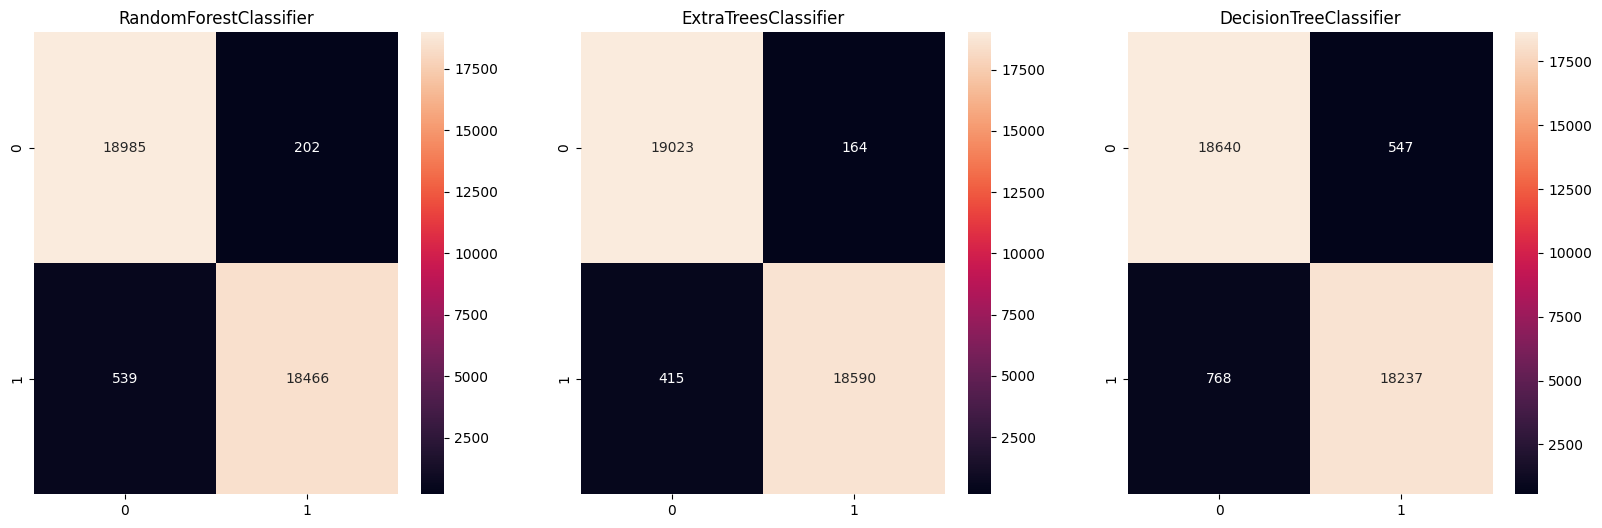

In [ ]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,3, figsize=(20,6))

# Confusion Matrix - RandomForestClassifier
sns.heatmap(confusion_matrix(y_test, y_predict_rfc),
            ax=ax[0], annot= True, fmt=".0f")
ax[0].set_title('RandomForestClassifier')

# Confusion Matrix - ExtraTreesClassifier
sns.heatmap(confusion_matrix(y_test, y_predict_etc),
            ax=ax[1], annot= True, fmt=".0f")
ax[1].set_title('ExtraTreesClassifier')

# Confusion Matrix - DecisionTreeClassifier
sns.heatmap(confusion_matrix(y_test, y_predict_dtc),
            ax=ax[2], annot= True, fmt=".0f")
ax[2].set_title('DecisionTreeClassifier')

plt.show()

## Distribution Plot

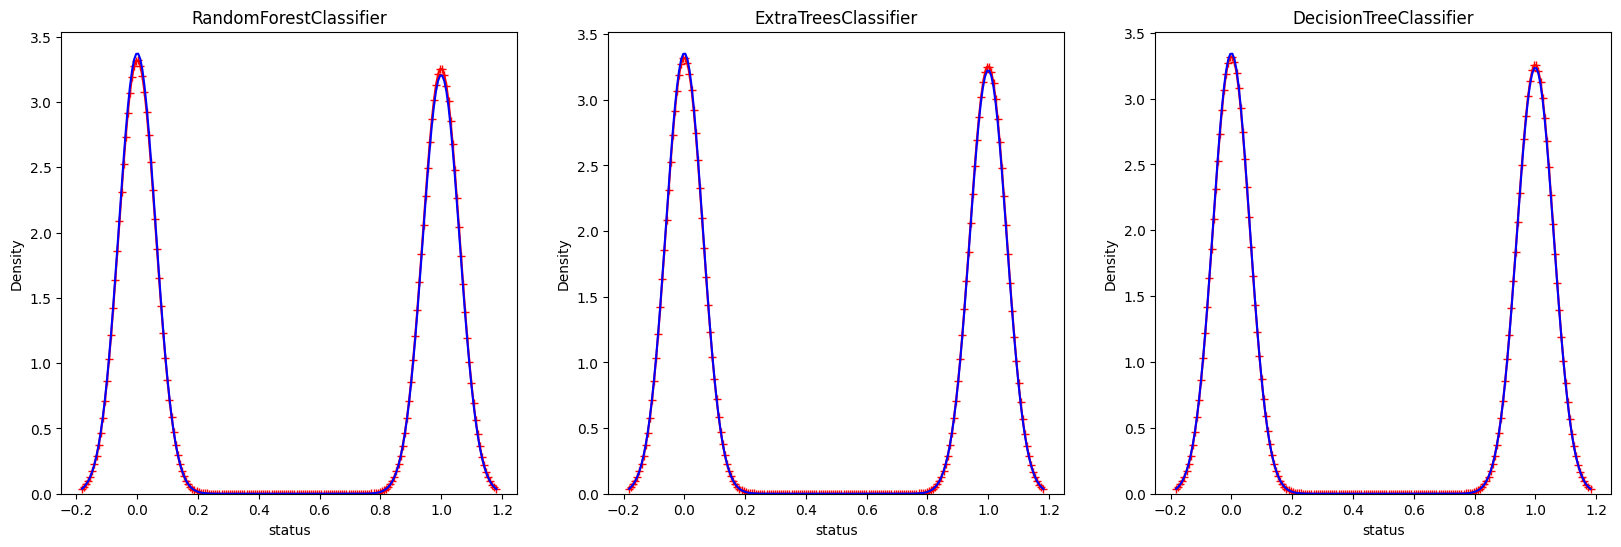

In [41]:
fig, ax = plt.subplots(1,3, figsize=(20,6))

# RandomForestClassifier
sns.kdeplot(y_test, color='r', label='Actual values', marker='+', ax=ax[0])
sns.kdeplot(y_predict_rfc, color='b', label='Fitted values', ax=ax[0])
ax[0].set_title('RandomForestClassifier')

# ExtraTreesClassifier
sns.kdeplot(y_test, color='r', label='Actual values', marker='+',ax=ax[1])
sns.kdeplot(y_predict_etc, color='b', label='Fitted values', ax=ax[1])
ax[1].set_title('ExtraTreesClassifier')

# DecisionTreeClassifier
sns.kdeplot(y_test, color='r', label='Actual values', marker='+', ax=ax[2])
sns.kdeplot(y_predict_dtc, color='b', label='Fitted values', ax=ax[2])
ax[2].set_title('DecisionTreeClassifier')

plt.show()

## Classification Report

In [ ]:
print('RandomForestClassifier:\n', classification_report(y_test, y_predict_rfc))
print()
print('ExtraTreesClassifier:\n', classification_report(y_test, y_predict_etc))
print()
print('Decision Tree Classifier:\n', classification_report(y_test, y_predict_dtc))

RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     19187
           1       0.99      0.97      0.98     19005

    accuracy                           0.98     38192
   macro avg       0.98      0.98      0.98     38192
weighted avg       0.98      0.98      0.98     38192


ExtraTreesClassifier:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     19187
           1       0.99      0.98      0.98     19005

    accuracy                           0.98     38192
   macro avg       0.98      0.98      0.98     38192
weighted avg       0.98      0.98      0.98     38192


Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     19187
           1       0.97      0.96      0.97     19005

    accuracy                           0.97     38192
   macro avg       0.97      0.97      0.97     381

## Model Metrics

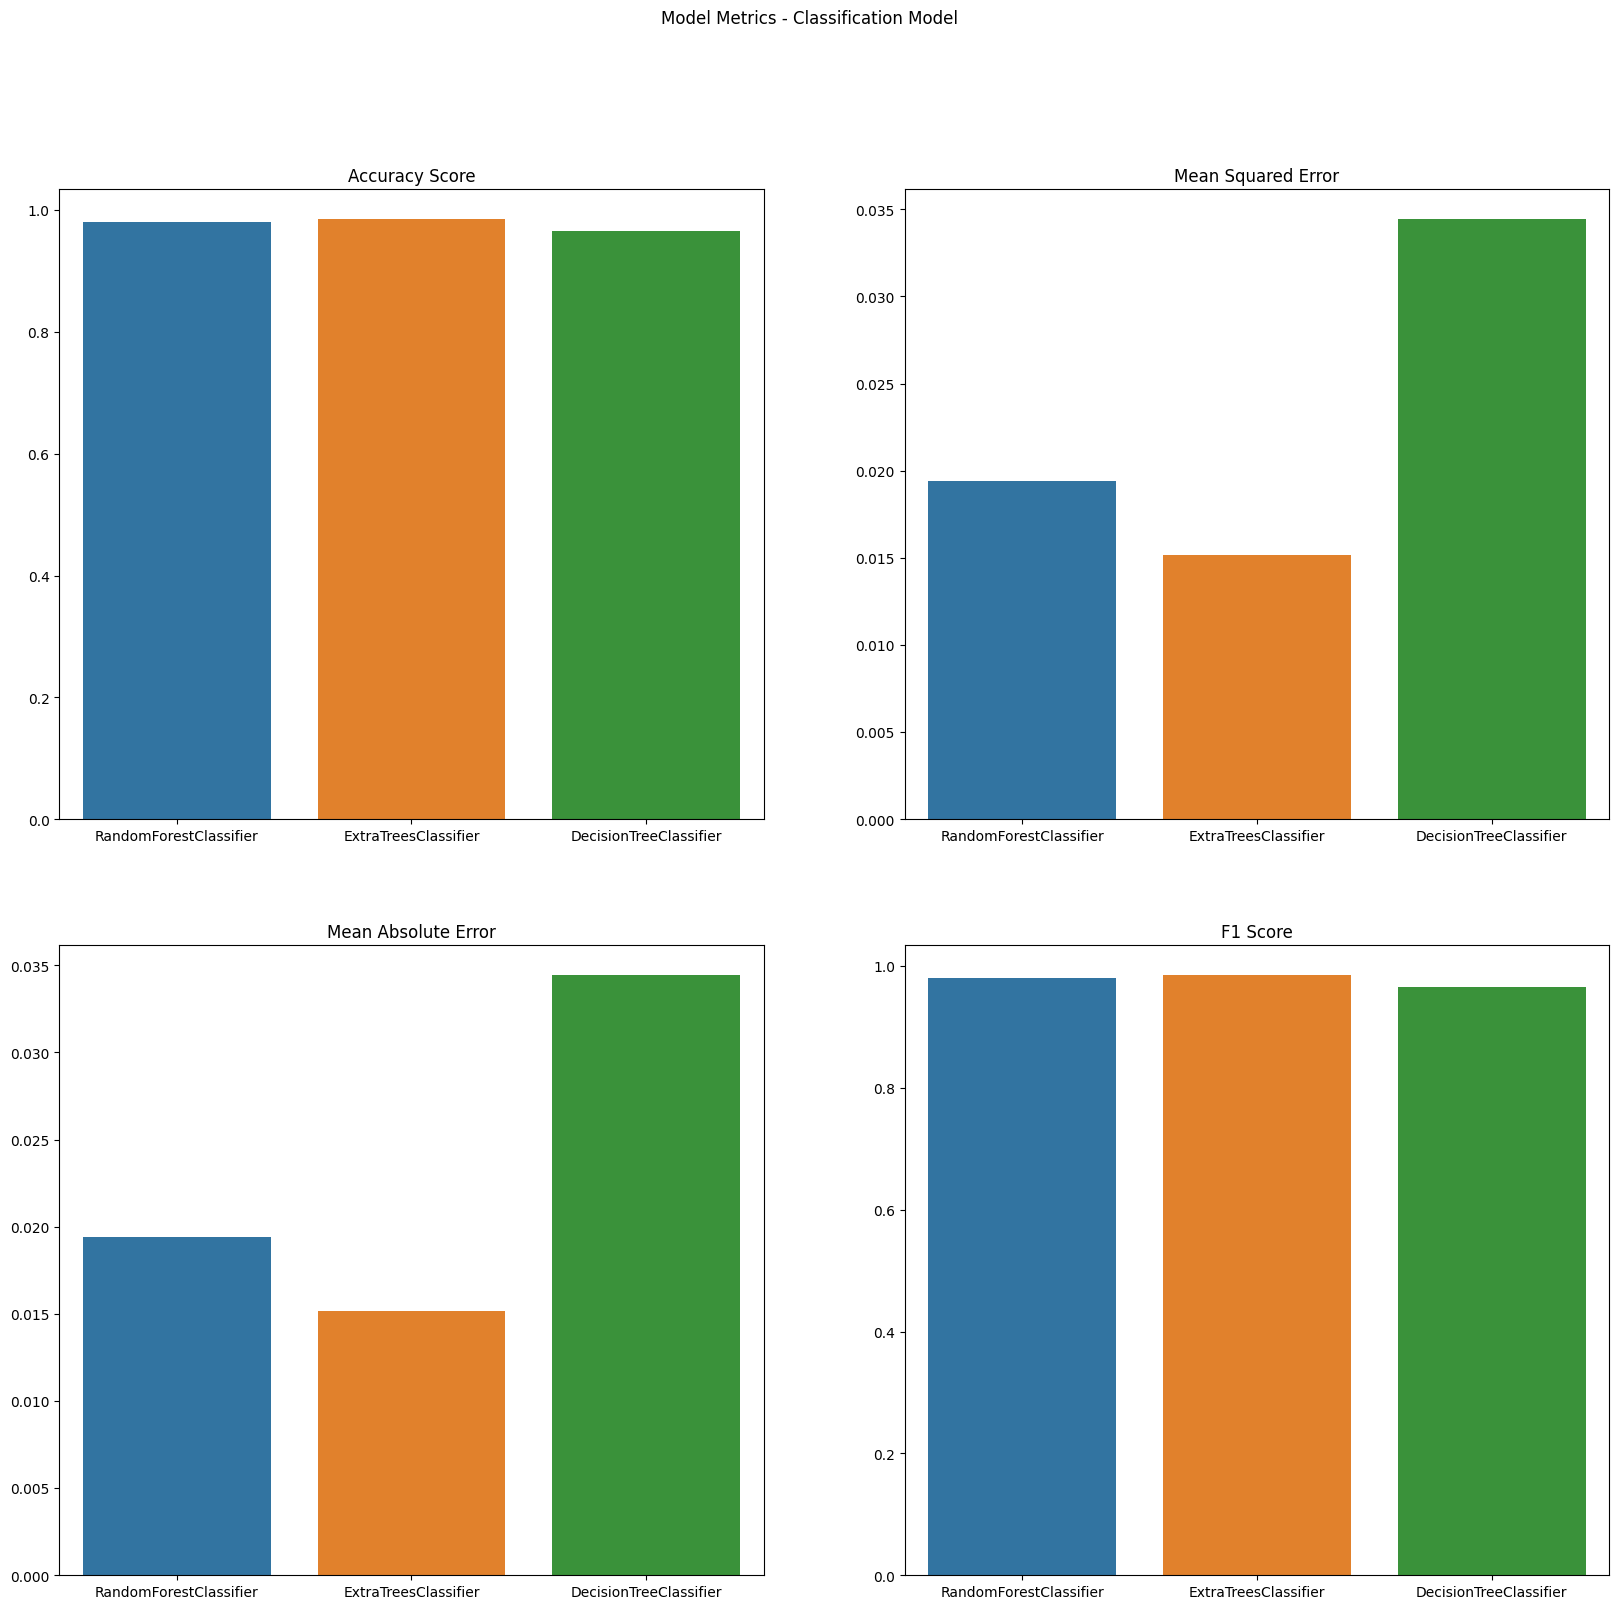

In [ ]:

fig, axs = plt.subplots(2,2, figsize=(20,18))
plt.suptitle('Model Metrics - Classification Model')

# Accuracy Score
sns.barplot(x=['RandomForestClassifier','ExtraTreesClassifier','DecisionTreeClassifier'],
            y=[accuracy_score(y_test,y_predict_rfc),
               accuracy_score(y_test,y_predict_etc),
               accuracy_score(y_test,y_predict_dtc)],
               ax=axs[0,0])
axs[0,0].set_title("Accuracy Score")

# Mean Squared Error
sns.barplot(x=['RandomForestClassifier','ExtraTreesClassifier','DecisionTreeClassifier'],
            y=[mean_squared_error(y_test,y_predict_rfc),
               mean_squared_error(y_test,y_predict_etc),
               mean_squared_error(y_test,y_predict_dtc)],
               ax=axs[0,1])
axs[0,1].set_title("Mean Squared Error")

# Mean absolute Error
sns.barplot(x=['RandomForestClassifier','ExtraTreesClassifier','DecisionTreeClassifier'],
            y=[mean_absolute_error(y_test,y_predict_rfc),
               mean_absolute_error(y_test,y_predict_etc),
               mean_absolute_error(y_test,y_predict_dtc)],
               ax=axs[1,0])
axs[1,0].set_title("Mean Absolute Error")


# F1 Score
sns.barplot(x=['RandomForestClassifier','ExtraTreesClassifier','DecisionTreeClassifier'],
            y=[f1_score(y_test,y_predict_rfc),
               f1_score(y_test,y_predict_etc),
               f1_score(y_test,y_predict_dtc)],
               ax=axs[1,1])
axs[1,1].set_title("F1 Score")



plt.show()